In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
leads = pd.read_csv("C:/Users/PaulB/OneDrive/Desktop/First Capstone/leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leads.shape

(9240, 37)

In [7]:
#check for nulls in columns
leads.isnull().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Some of these columns are missing a lot of values. Man. 

In [8]:
converts = leads['Converted']
converts.sum()/len(leads)

0.3853896103896104

Before cleaning, their conversion is actually closer to 40%

In [9]:
#look at values and check for nulls
print(leads['Asymmetrique Activity Index'].value_counts())
sum(leads['Asymmetrique Activity Index'].isnull())

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


4218

In [10]:
#replace nulls with NaN
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].fillna('NaN')
leads['Asymmetrique Activity Index'].value_counts()

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [11]:
#check for null values after filling
sum(leads['Asymmetrique Activity Index'].isnull())

0

In [12]:
#look at values and check for nulls
print(leads['Asymmetrique Profile Index'].value_counts())
sum(leads['Asymmetrique Profile Index'].isnull())

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


4218

In [13]:
#replace nulls with NaN
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Profile Index'].fillna('NaN')
leads['Asymmetrique Profile Index'].value_counts()

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [14]:
#check for null values after filling
sum(leads['Asymmetrique Profile Index'].isnull())

0

In [15]:
#look at values and check for nulls
print(leads['Asymmetrique Activity Score'].value_counts())
sum(leads['Asymmetrique Activity Score'].isnull())

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64


4218

In [16]:
#replace nulls with NaN
leads['Asymmetrique Activity Score'] = leads['Asymmetrique Profile Index'].fillna('NaN')
leads['Asymmetrique Activity Score'].value_counts()

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Activity Score, dtype: int64

In [17]:
#check for null values after filling
sum(leads['Asymmetrique Activity Score'].isnull())

0

In [18]:
#look at values and check for nulls
print(leads['Asymmetrique Profile Score'].value_counts())
sum(leads['Asymmetrique Profile Score'].isnull())

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


4218

In [19]:
#replace nulls with NaN
leads['Asymmetrique Profile Score'] = leads['Asymmetrique Profile Score'].fillna('NaN')
leads['Asymmetrique Activity Score'].value_counts()

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Activity Score, dtype: int64

In [20]:
#check for null values after filling
sum(leads['Asymmetrique Profile Score'].isnull())

0

Cleaning Lead Quality

In [21]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [22]:
#check for nulls
leads['Lead Quality'].isnull().sum()

4767

In [23]:
#replace nulls with NaN
leads['Lead Quality'].fillna("NaN", inplace = True)
leads['Lead Quality'].value_counts()

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [24]:
#make sure nulls have been replaced
leads['Lead Quality'].isnull().sum()

0

Adding Nulls to Tag columns

In [25]:
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [26]:
#check for nulls
sum(leads['Tags'].isnull())

3353

In [27]:
#replace nulls with NaN
leads['Tags'].fillna('NaN', inplace = True)
leads['Tags'].value_counts()

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
#check for remaing nulls
sum(leads['Tags'].isnull())

0

Adding Nan values for missing country value

In [29]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Ghana                      2
Italy                      2
Netherlands                2
Bangladesh                 2
China                      2
Russia                     1
Tanzania                   1
Switzerland                1
Kenya                      1
Indonesia                  1
Liberia                    1
Denmark       

In [30]:
#check for nulls
sum(leads['Country'].isnull())

2461

In [31]:
#replace nulls with NaN
leads['Country'].fillna('NaN', inplace = True)
leads['Country'].value_counts()

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
China                      2
Netherlands                2
Ghana                      2
Uganda                     2
Italy                      2
Philippines                2
Bangladesh                 2
Russia                     1
Tanzania                   1
Switzerland                1
Kenya                      1
Indonesia                  1
Liberia       

In [32]:
#check for remaining nulls
sum(leads['Country'].isnull())

0

Checking and cleaning Total visits

In [33]:
leads['TotalVisits'].value_counts() 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [34]:
#check for null values
sum(leads['TotalVisits'].isnull())

137

In [35]:
# replace null values with the median of 'Totalvisits'
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

In [36]:
#check for remaining null values
sum(leads['TotalVisits'].isnull())

0

Checking page views and replacing missing values with median

In [37]:
#taking a look, small amount of null values
print(leads['Page Views Per Visit'].value_counts())
sum(leads['Page Views Per Visit'].isnull())

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64


137

In [38]:
#replace null values with the median value
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

Cleaning Last Activity

In [39]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [40]:
#check for nulls
sum(leads['Last Activity'].isnull())

103

In [41]:
#replace nulls with NaN
leads['Last Activity'].fillna("NaN", inplace = True)
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [42]:
#check for null
sum(leads['Last Activity'].isnull())

0

Cleaning specializations, the select value is useless, so it will be relabled to NaN

In [43]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
#check for nulls
sum(leads['Specialization'].isnull())

1438

In [45]:
#replace select and nulls with NaN and then check for remaining select
leads['Specialization'].replace('Select', 'NaN', inplace =True)
leads['Specialization'].fillna("NaN", inplace = True)
leads['Specialization'].value_counts()

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [46]:
#check for remaing null values
sum(leads['Specialization'].isnull())

0

Cleaning How did you hear about X Education

Kevin: I think since more than half of this column is 'Select' it should be dropped entirely?

To drop or not to drop, that is the question:
Whether 'tis nobler in the mind to replace
The nulls and selects with outrageous quantities of NaN,
Or to take the drop method against a series of troubles
And by dropping end them.

In [47]:
#look athe number of selects in "How did you hear about X Education"
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [48]:
#drop the column
leads = leads.drop('How did you hear about X Education', axis=1)

Cleaning current occupation

In [49]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
#look for null values
sum(leads['What is your current occupation'].isnull())

2690

In [51]:
#replace null values with NaN
leads['What is your current occupation'].fillna("NaN", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [52]:
#replace null values with NaN
sum(leads['What is your current occupation'].isnull())

0

Dropping "what matters most to you in choosing a course" because almost everyone picks the Better Career Prospects option

In [53]:
#look at values for column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [54]:
#drop column
leads = leads.drop('What matters most to you in choosing a course', axis = 1)

Cleaning Lead Profile column

Kevin: Should I keep this? Seems like a really useful type of data for this problem. But look at that select and null count...

In [55]:
#look at amount of select in column
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [56]:
#check for null values
sum(leads['Lead Profile'].isnull())

2709

In [57]:
#replace null values with NaN
leads['Lead Profile'].replace('Select', 'NaN', inplace =True)
leads['Lead Profile'].value_counts()

NaN                            4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [58]:
#check for remaining null values 
leads['Lead Profile'].fillna("NaN", inplace = True)
leads['Lead Profile'].value_counts()

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Cleaning City Column

In [59]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [60]:
sum(leads['City'].isnull())

1420

In [61]:
leads['City'].fillna("NaN", inplace = True) # Replacing null values with 'NotSpecified' 
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [62]:
leads['City'].replace('Select', 'NaN', inplace =True)
leads['City'].value_counts()

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [63]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
youtubechannel          1
blog                    1
testone                 1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [64]:
sum(leads['Lead Source'].isnull())

36

In [65]:
# Fix duplicates by making all values capitals 
leads['Lead Source'] = leads['Lead Source'].str.capitalize()

In [66]:
leads['Lead Source'].value_counts()

Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Welearn                 1
Nc_edm                  1
Blog                    1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Pay per click ads       1
Name: Lead Source, dtype: int64

In [67]:
leads['Lead Source'].fillna("NaN", inplace = True) # Replacing null values with 'NotSpecified' 
leads['Lead Source'].value_counts()

Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
NaN                    36
Bing                    6
Click2call              4
Social media            2
Press_release           2
Live chat               2
Welearnblog_home        1
Youtubechannel          1
Nc_edm                  1
Welearn                 1
Testone                 1
Pay per click ads       1
Blog                    1
Name: Lead Source, dtype: int64

In [68]:
sum(leads['Lead Source'].isnull())

0

In [69]:
#Look for missing values still
round((leads.isnull().sum(axis = 0)/ len(leads.index))*100 , 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Looks like all null values are gone.

Check for outliers in the continous variables TotalVisits, Total Time Spend on Website, Page Views Per Visit
Kevin is IQR a good method for eliminating these outliers?

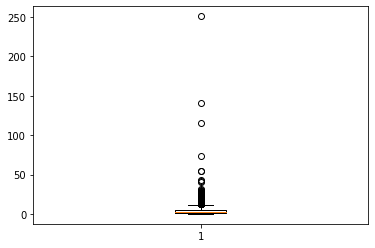

In [70]:
#boxplot to check for outliers in total visits
plt.boxplot(leads['TotalVisits'])
plt.show()

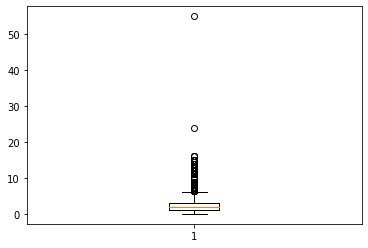

In [71]:
#boxplot to check for outliers in Page Views Per Visit
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

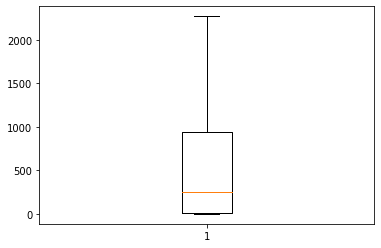

In [72]:
#boxplot to check for outliers in total time spent on website
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [73]:
#Create IQR
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

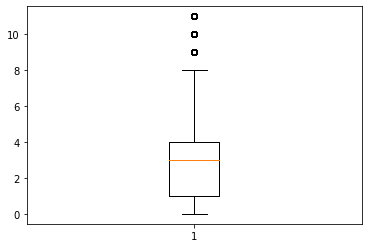

In [74]:
plt.boxplot(leads['TotalVisits'])
plt.show()

In [75]:
Q1 = leads['Total Time Spent on Website'].quantile(0.25)
Q3 - leads['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

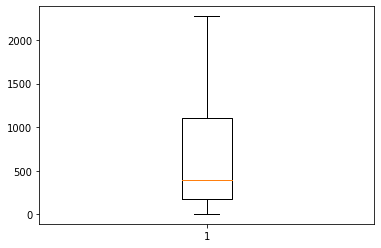

In [76]:
plt.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [77]:
Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 - leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

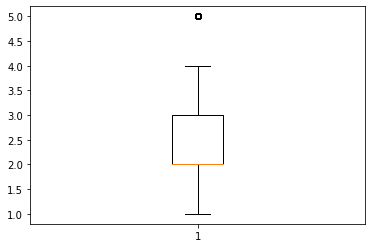

In [78]:
plt.boxplot(leads['Page Views Per Visit'])
plt.show()

In [79]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,02.Medium,15,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,01.High,20,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,01.High,17,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,01.High,18,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,01.High,20,No,No,Modified


In [80]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 1 to 9238
Data columns (total 35 columns):
Prospect ID                                 5384 non-null object
Lead Number                                 5384 non-null int64
Lead Origin                                 5384 non-null object
Lead Source                                 5384 non-null object
Do Not Email                                5384 non-null object
Do Not Call                                 5384 non-null object
Converted                                   5384 non-null int64
TotalVisits                                 5384 non-null float64
Total Time Spent on Website                 5384 non-null int64
Page Views Per Visit                        5384 non-null float64
Last Activity                               5384 non-null object
Country                                     5384 non-null object
Specialization                              5384 non-null object
What is your current occupation             5384 

Notes from Kevin: chunking and segmenting for EDA basic hypothesis testing hierachy variables / ordinals look for bias in data significance watch for skew